In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read tornadoes csv file into pandas dataframe
tornadoes_df = pd.read_csv("./us_tornado_dataset_1950_2021.csv")
tornadoes_df


yr  mo  dy        date  st  mag  inj  fat     slat     slon     elat  \
0      1950   1   3  1950-01-03  IL    3    3    0  39.1000 -89.3000  39.1200   
1      1950   1   3  1950-01-03  MO    3    3    0  38.7700 -90.2200  38.8300   
2      1950   1   3  1950-01-03  OH    1    1    0  40.8800 -84.5800   0.0000   
3      1950   1  13  1950-01-13  AR    3    1    1  34.4000 -94.3700   0.0000   
4      1950   1  25  1950-01-25  IL    2    0    0  41.1700 -87.3300   0.0000   
...     ...  ..  ..         ...  ..  ...  ...  ...      ...      ...      ...   
67553  2021  12  30  2021-12-30  GA    1    0    0  31.1703 -83.3804  31.1805   
67554  2021  12  30  2021-12-30  GA    1    0    0  31.6900 -82.7300  31.7439   
67555  2021  12  31  2021-12-31  AL    1    0    0  34.2875 -85.7878  34.2998   
67556  2021  12  31  2021-12-31  GA    1    0    0  33.7372 -84.9998  33.7625   
67557  2021  12  31  2021-12-31  GA    1    6    0  33.5676 -83.9877  33.5842   

          elon    len  wid  
0     -89.2300   3.60  130  
1     -90.0300   9.50  150  
2       0.0000   0.10   10  
3       0.0000   0.60   17  
4       0.0000   0.10  100  
...        ...    ...  ...  
67553 -83.3453   2.19  150  
67554 -82.5412  11.71  300  
67555 -85.7805   0.95   50  
67556 -84.9633   2.75  150  
67557 -83.9498   2.50   75  

[67558 rows x 14 columns]

In [4]:
# double-check for missing values in dataset
# tornadoes_df.isnull().sum
print(tornadoes_df.isnull().sum())

yr      0
mo      0
dy      0
date    0
st      0
mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64


In [5]:
print(type(tornadoes_df['wid'][0]))

<class 'numpy.int64'>


In [6]:
# convert date column to datetime format
tornadoes_df['date'] = pd.to_datetime(tornadoes_df['date'])
print(tornadoes_df.head())

     yr  mo  dy       date  st  mag  inj  fat   slat   slon   elat   elon  \
0  1950   1   3 1950-01-03  IL    3    3    0  39.10 -89.30  39.12 -89.23   
1  1950   1   3 1950-01-03  MO    3    3    0  38.77 -90.22  38.83 -90.03   
2  1950   1   3 1950-01-03  OH    1    1    0  40.88 -84.58   0.00   0.00   
3  1950   1  13 1950-01-13  AR    3    1    1  34.40 -94.37   0.00   0.00   
4  1950   1  25 1950-01-25  IL    2    0    0  41.17 -87.33   0.00   0.00   

   len  wid  
0  3.6  130  
1  9.5  150  
2  0.1   10  
3  0.6   17  
4  0.1  100  


In [7]:
# Check to see if it worked
print(type(tornadoes_df['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
# Describe shows us the data is skewed when looking at magnitude, injuries, length and width
tornadoes_df.describe()

yr            mo            dy           mag           inj  \
count  67558.000000  67558.000000  67558.000000  67558.000000  67558.000000   
mean    1991.341618      5.976761     15.921016      0.691273      1.437876   
std       19.330015      2.438192      8.736773      1.283375     18.263956   
min     1950.000000      1.000000      1.000000     -9.000000      0.000000   
25%     1976.000000      4.000000      8.000000      0.000000      0.000000   
50%     1994.000000      6.000000     16.000000      1.000000      0.000000   
75%     2008.000000      7.000000     24.000000      1.000000      0.000000   
max     2021.000000     12.000000     31.000000      5.000000   1740.000000   

                fat          slat          slon          elat          elon  \
count  67558.000000  67558.000000  67558.000000  67558.000000  67558.000000   
mean       0.090470     37.142412    -92.784618     22.730695    -56.245590   
std        1.484106      5.093979      8.689103     18.588638     45.489157   
min        0.000000     17.721200   -163.530000      0.000000   -163.530000   
25%        0.000000     33.220000    -98.450000      0.000000    -94.709800   
50%        0.000000     37.030000    -93.600000     32.480000    -84.420000   
75%        0.000000     40.930000    -86.730000     38.610000      0.000000   
max      158.000000     61.020000    -64.715100     61.020000      0.000000   

                len           wid  
count  67558.000000  67558.000000  
mean       3.478340    106.577030  
std        8.278775    205.802676  
min        0.000000      0.000000  
25%        0.100000     20.000000  
50%        0.800000     50.000000  
75%        3.130000    100.000000  
max      234.700000   4576.000000

array([[<Axes: title={'center': 'mag'}>]], dtype=object)

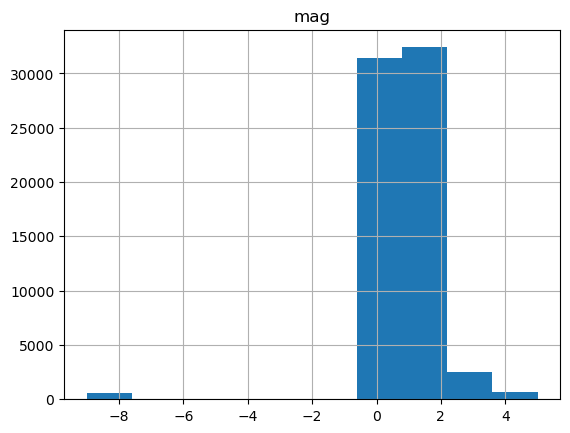

In [9]:
# histogram to show distribution of magnitude
# shows most tornadoes have magnitude of 0, 1, and 2
tornadoes_df.hist(column='mag')

array([[<Axes: title={'center': 'inj'}>]], dtype=object)

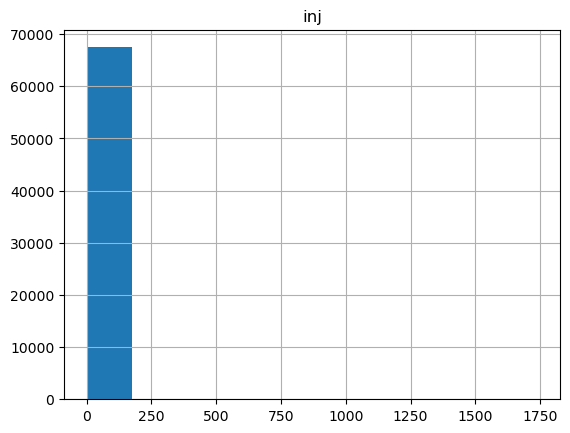

In [10]:
# histogram to show distribution of injuries
# shows that most of tornadoes result to less than 250 to no injuries
tornadoes_df.hist(column='inj')

array([[<Axes: title={'center': 'fat'}>]], dtype=object)

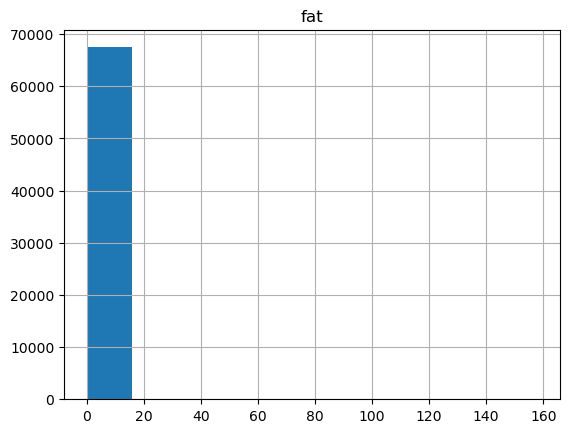

In [11]:
# histogram to show distribution of fatalities
# shows that most of tornadoes result to less than 20 to no fatalities
tornadoes_df.hist(column='fat')

array([[<Axes: title={'center': 'len'}>]], dtype=object)

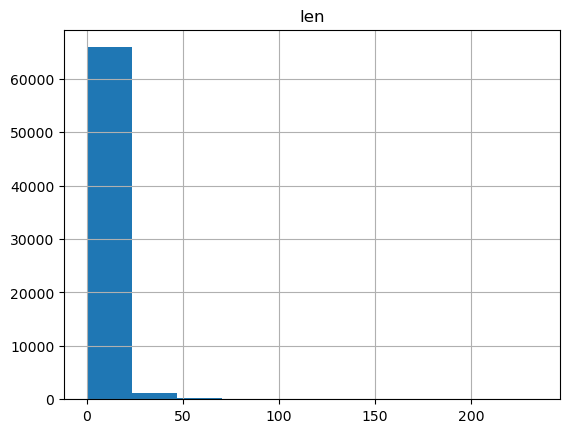

In [12]:
# histogram to show distribution of length of tornadoes in miles
# shows that most tornadoes length is less than 50 miles
tornadoes_df.hist(column='len')

array([[<Axes: title={'center': 'wid'}>]], dtype=object)

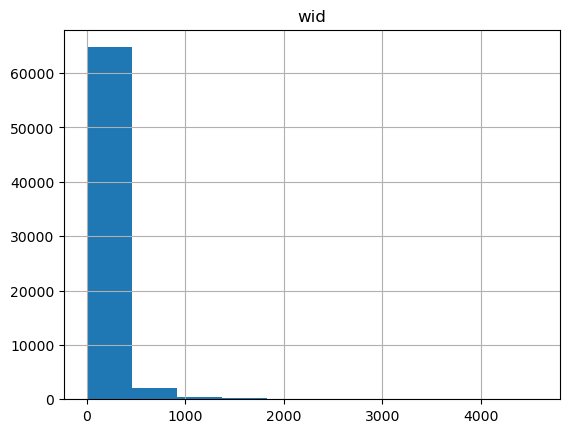

In [13]:
# histogram to show width of tornadoes in yards
# showes that most tornadoes are less than about 500 yards
tornadoes_df.hist(column='wid')

In [14]:
# deadliest tornado
print(tornadoes_df[tornadoes_df.fat==tornadoes_df.fat.max()])

         yr  mo  dy       date  st  mag   inj  fat     slat     slon     elat  \
55529  2011   5  22 2011-05-22  MO    5  1150  158  37.0524 -94.5932  36.9838   

          elon    len   wid  
55529 -94.2213  21.62  1600  


In [15]:
# tornado with most injuries
print(tornadoes_df[tornadoes_df.inj==tornadoes_df.inj.max()])

         yr  mo  dy       date  st  mag   inj  fat   slat   slon   elat  \
19464  1979   4  10 1979-04-10  TX    4  1740   42  33.82 -98.65  34.18   

        elon   len   wid  
19464 -97.98  46.9  1320  


In [16]:
# tornadoes with least injury or no injuries
least_inj = tornadoes_df[tornadoes_df.inj==tornadoes_df.inj.min()]
print(least_inj)


         yr  mo  dy       date  st  mag  inj  fat     slat     slon     elat  \
4      1950   1  25 1950-01-25  IL    2    0    0  41.1700 -87.3300   0.0000   
7      1950   2  11 1950-02-11  TX    2    0    0  29.4200 -95.2500  29.5200   
11     1950   2  12 1950-02-12  AR    2    0    0  34.4800 -92.4000   0.0000   
12     1950   2  12 1950-02-12  AR    2    0    0  33.2700 -92.9500  33.3500   
13     1950   2  12 1950-02-12  LA    1    0    0  32.6000 -91.3300   0.0000   
...     ...  ..  ..        ...  ..  ...  ...  ...      ...      ...      ...   
67552  2021  12  30 2021-12-30  GA    1    0    0  31.1087 -83.7293  31.1184   
67553  2021  12  30 2021-12-30  GA    1    0    0  31.1703 -83.3804  31.1805   
67554  2021  12  30 2021-12-30  GA    1    0    0  31.6900 -82.7300  31.7439   
67555  2021  12  31 2021-12-31  AL    1    0    0  34.2875 -85.7878  34.2998   
67556  2021  12  31 2021-12-31  GA    1    0    0  33.7372 -84.9998  33.7625   

          elon    len  wid  
4       0.

<Axes: xlabel='yr', ylabel='Count'>

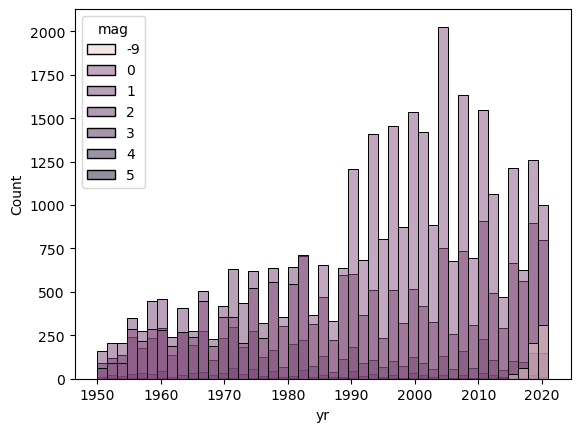

In [17]:
# Histogram of tornadoes with no injuries or fatalities
# most of them are not of high magnitude and they take place in later years
sns.histplot(data=least_inj,x='yr', hue='mag')

In [156]:
# Tornadoes with the highest magnitude data sorted in ascending order by year
highmag = pd.DataFrame(tornadoes_df[tornadoes_df.mag==tornadoes_df.mag.max()])
print(highmag.sort_values(by=['yr'], ascending=True))
print('total tornadoes with the highest magnitude: ',len(highmag))

         yr  mo  dy       date  st  mag   inj  fat     slat      slon  \
864    1953   5  11 1953-05-11  TX    5   597  114  31.5500  -97.1500   
901    1953   5  29 1953-05-29  ND    5    20    2  46.4500 -100.6700   
973    1953   6   8 1953-06-08  MI    5   844  116  43.1000  -83.8500   
1019   1953   6  27 1953-06-27  IA    5     2    1  41.4500  -94.7000   
1116   1953  12   5 1953-12-05  MS    5   270   38  32.3300  -90.9000   
1895   1955   5  25 1955-05-25  OK    5   280   20  36.7200  -97.2800   
1896   1955   5  25 1955-05-25  OK    5   273   80  36.8800  -97.1500   
2378   1956   4   3 1956-04-03  MI    5   292   17  42.6500  -86.2200   
3131   1957   5  20 1957-05-20  KS    5   207   44  38.4500  -95.5000   
3358   1957   6  20 1957-06-20  ND    5   103   10  46.9000  -97.3500   
3606   1957  12  18 1957-12-18  IL    5     6    1  38.0800  -89.2500   
3832   1958   6   4 1958-06-04  WI    5    74   21  44.9000  -92.3300   
4983   1960   5   5 1960-05-05  OK    5    81    5 

In [140]:
# Group high magnitude tornado data by state
highmagbystate= highmag.groupby(['yr', 'st']).size().reset_index(name='Count') 
print(highmagbystate)

      yr  st  Count
0   1953  IA      1
1   1953  MI      1
2   1953  MS      1
3   1953  ND      1
4   1953  TX      1
5   1955  OK      2
6   1956  MI      1
7   1957  IL      1
8   1957  KS      1
9   1957  ND      1
10  1958  WI      1
11  1960  OK      1
12  1964  NE      1
13  1964  TX      1
14  1965  SD      1
15  1966  IA      1
16  1966  KS      1
17  1966  MS      1
18  1968  IA      2
19  1968  MN      1
20  1968  OH      1
21  1970  TX      1
22  1971  LA      1
23  1973  TX      1
24  1974  AL      3
25  1974  IN      2
26  1974  KY      1
27  1974  OH      1
28  1976  IA      1
29  1976  OK      1
30  1976  TX      1
31  1977  AL      1
32  1982  OK      1
33  1984  WI      1
34  1985  OH      1
35  1990  IL      1
36  1990  KS      2
37  1991  KS      1
38  1992  MN      1
39  1996  WI      1
40  1997  TX      1
41  1998  AL      1
42  1998  TN      1
43  1999  OK      1
44  2007  KS      1
45  2008  IA      1
46  2011  AL      2
47  2011  MO      1
48  2011  MS      2


In [143]:
# Pivot data for stacked bar chart
pivot_highmag = highmagbystate.pivot(index='yr', columns='st', values='Count').fillna(0)
print(pivot_highmag)

st     AL   IA   IL   IN   KS   KY   LA   MI   MN   MO   MS   ND   NE   OH  \
yr                                                                           
1953  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
1955  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1956  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1957  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1958  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1960  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1964  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1965  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1966  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1968  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
1970  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

<function matplotlib.pyplot.show(close=None, block=None)>

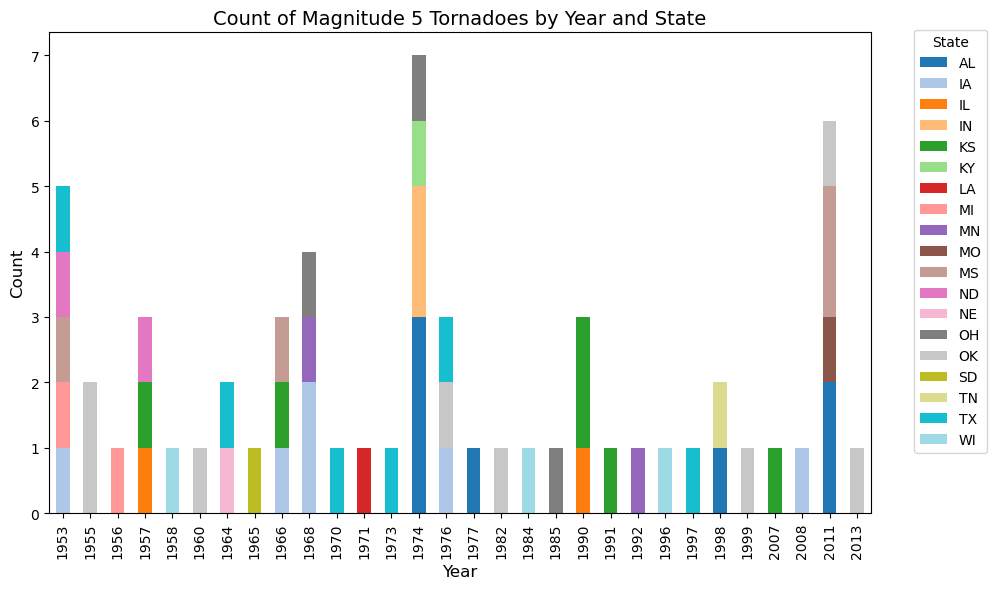

In [148]:
# The most tornadoes of with a max magnitude took place in 1974.  A total of 7, with 3 taking place in Alabama.
# Plot the max magnitude--in this case, magnitude 5--pivot data

pivot_highmag.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Count of Magnitude 5 Tornadoes by Year and State', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.15, 1.02))
plt.tight_layout()
plt.show

In [163]:
# Which state did most of the tornadoes take place for the entire dataset
state = tornadoes_df.groupby('st').count()
# state
print(state[state.yr==state.yr.max()]) #any column can be used considering they all have frequencies

      yr    mo    dy  date   mag   inj   fat  slat  slon  elat  elon   len  \
st                                                                           
TX  9149  9149  9149  9149  9149  9149  9149  9149  9149  9149  9149  9149   

     wid  
st        
TX  9149  


In [21]:
# Which state within this dataset had the least tornadoes for the entire dataset
print(state[state.yr==state.yr.min()])

    yr  mo  dy  date  mag  inj  fat  slat  slon  elat  elon  len  wid
st                                                                   
VI   1   1   1     1    1    1    1     1     1     1     1    1    1


In [176]:
# aggregate original dataset for counts of tornadoes by state and their magnitudes
tornadoesbystate= tornadoes_df.groupby(['st', 'mag']).size().reset_index(name='Count') 
print(tornadoesbystate)

     st  mag  Count
0    AK    0      4
1    AL   -9      5
2    AL    0    793
3    AL    1    922
4    AL    2    459
..   ..  ...    ...
272  WY    0    432
273  WY    1    190
274  WY    2     59
275  WY    3     13
276  WY    4      1

[277 rows x 3 columns]


In [177]:
# create a pivot to graph
pivot_bystate = tornadoesbystate.pivot(index='st', columns='mag', values='Count').fillna(0)
print(pivot_bystate)

mag     -9       0       1       2      3     4    5
st                                                  
AK     0.0     4.0     0.0     0.0    0.0   0.0  0.0
AL     5.0   793.0   922.0   459.0  137.0  35.0  7.0
AR     5.0   544.0   764.0   426.0  144.0  29.0  0.0
AZ     1.0   178.0    72.0    16.0    3.0   0.0  0.0
CA     2.0   311.0   123.0    24.0    2.0   0.0  0.0
CO    56.0  1520.0   585.0   122.0   23.0   0.0  0.0
CT     1.0    35.0    57.0    21.0    4.0   2.0  0.0
DC     0.0     3.0     0.0     0.0    0.0   0.0  0.0
DE     0.0    24.0    30.0    14.0    1.0   0.0  0.0
FL     4.0  2125.0   996.0   330.0   40.0   2.0  0.0
GA     2.0   557.0   843.0   319.0   70.0  10.0  0.0
HI     0.0    28.0     9.0     4.0    0.0   0.0  0.0
IA    68.0  1197.0   885.0   465.0  112.0  40.0  6.0
ID     0.0   147.0    61.0    10.0    0.0   0.0  0.0
IL    51.0  1213.0   879.0   402.0  106.0  29.0  2.0
IN     2.0   513.0   610.0   299.0   91.0  26.0  2.0
KS    60.0  2551.0  1075.0   457.0  188.0  38.

<function matplotlib.pyplot.show(close=None, block=None)>

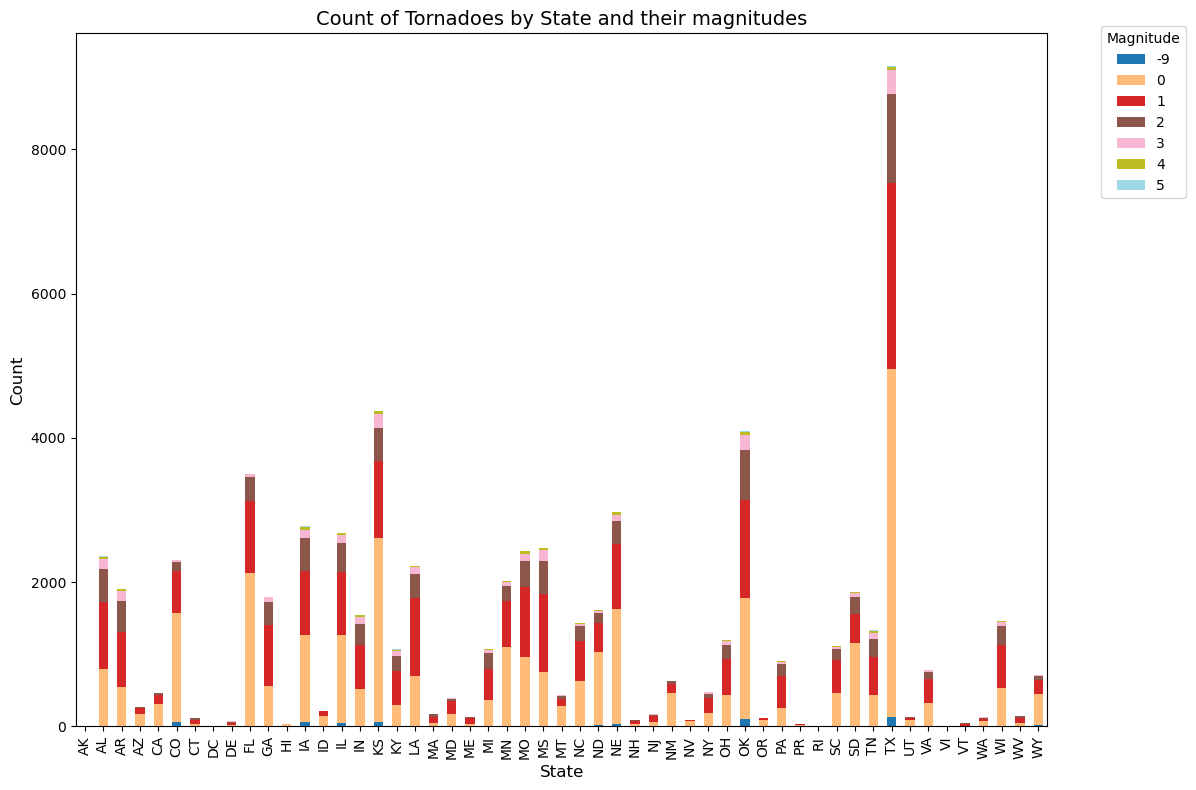

In [171]:
# The state with the most tornadoes is Texas, although almost 5,000 had a magnitude of 0
# Plot the tornadoes by state with their magnitudes
pivot_bystate.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Count of Tornadoes by State and their magnitudes', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Magnitude', loc='upper right', bbox_to_anchor=(1.15, 1.02))
plt.tight_layout()
plt.show

In [195]:
# aggregate original dataset for counts of tornadoes by year and magnitudes
# has the magnitude of tornadoes worsened over the years?
tornadoesbyyear = tornadoes_df.groupby(['yr', 'mag']).size().reset_index(name='Count')
print(tornadoesbyyear)

       yr  mag  Count
0    1950    0     16
1    1950    1     86
2    1950    2     68
3    1950    3     24
4    1950    4      7
..    ...  ...    ...
390  2021    0    556
391  2021    1    427
392  2021    2    104
393  2021    3     21
394  2021    4      3

[395 rows x 3 columns]


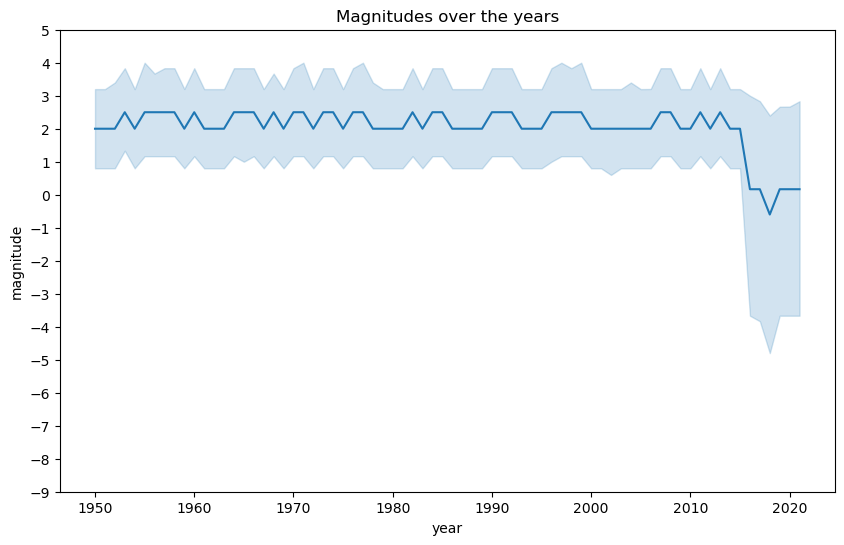

In [208]:
# lineplot showing Magnitudes over the years
plt.figure(figsize=(10,6)) #figure size wider to get a better visual for the tornadoes and magnitudes
line= sns.lineplot(data=tornadoesbyyear, x='yr', y='mag')
line.set(xlabel = 'year', ylabel= 'magnitude',
        title='Magnitudes over the years', yticks=[-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5])

plt.show()

In [196]:
# aggregate original dataset for average of tornadoes by year and magnitudes
# has the magnitude of tornadoes worsened over the years?
meanmagbyyear = tornadoes_df.groupby(['yr', 'mag'])['mag'].mean().reset_index
print(meanmagbyyear)

<bound method Series.reset_index of yr    mag
1950  0      0.0
      1      1.0
      2      2.0
      3      3.0
      4      4.0
            ... 
2021  0      0.0
      1      1.0
      2      2.0
      3      3.0
      4      4.0
Name: mag, Length: 395, dtype: float64>


In [200]:
#pivot of data by year and magnitude in counts
pivot_bymag_yr = tornadoesbyyear.pivot(index='yr', columns='mag', values='Count').fillna(0)
print(pivot_bymag_yr)

mag      -9      0      1      2     3     4    5
yr                                               
1950    0.0   16.0   86.0   68.0  24.0   7.0  0.0
1951    0.0   49.0  100.0   83.0  23.0   5.0  0.0
1952    0.0   32.0   82.0   72.0  36.0  18.0  0.0
1953    0.0   66.0  159.0  134.0  40.0  17.0  5.0
1954    0.0   89.0  226.0  189.0  39.0   7.0  0.0
...     ...    ...    ...    ...   ...   ...  ...
2017   64.0  630.0  590.0  129.0  13.0   2.0  0.0
2018   17.0  618.0  401.0   78.0  12.0   0.0  0.0
2019  186.0  647.0  531.0  117.0  33.0   3.0  0.0
2020  105.0  460.0  405.0   88.0  18.0   6.0  0.0
2021  203.0  556.0  427.0  104.0  21.0   3.0  0.0

[72 rows x 7 columns]


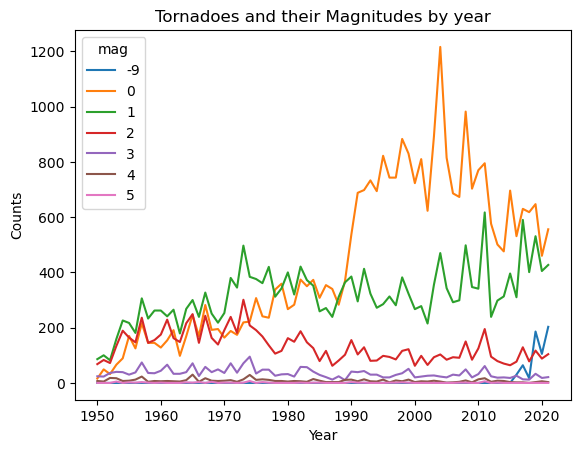

In [204]:
pivot_bymag_yr.plot(kind='line')
plt.title('Tornadoes and their Magnitudes by year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

In [24]:
# What year did we have the most tornadoes?
tornadoes_df['yr'].mode()



0    2004
Name: yr, dtype: int64

In [207]:
# which and how many tornadoes took place in 2004
print(tornadoes_df[tornadoes_df['yr']==2004])
count_in_2004=tornadoes_df[tornadoes_df['yr']==2004].shape[0]
print(count_in_2004)

         yr  mo  dy       date  st  mag  inj  fat   slat    slon   elat  \
45113  2004   1  16 2004-01-16  TX    0    0    0  31.98  -99.63  31.98   
45114  2004   1  25 2004-01-25  HI    0    0    0  21.42 -158.03  21.42   
45115  2004   1  25 2004-01-25  LA    2    3    0  30.15  -92.10  30.15   
45116  2004   2   2 2004-02-02  CA    0    0    0  35.10 -120.63  35.10   
45117  2004   2   5 2004-02-05  MS    1    0    0  32.23  -89.13  32.28   
...     ...  ..  ..        ...  ..  ...  ...  ...    ...     ...    ...   
46925  2004  12  22 2004-12-22  FL    0    0    0  30.38  -86.52  30.38   
46926  2004  12  29 2004-12-29  CA    0    0    0  33.78 -118.17  33.78   
46927  2004  12  29 2004-12-29  CA    0    0    0  33.97 -118.30  33.97   
46928  2004  12  29 2004-12-29  CA    0    0    0  33.95 -118.03  33.95   
46929  2004  12  29 2004-12-29  CA    0    0    0  38.45 -122.70  38.45   

         elon  len  wid  
45113  -99.63  0.5   75  
45114 -158.03  1.0   25  
45115  -92.08  1.0   

In [27]:
# How many tornadoes by year
year = tornadoes_df.groupby(['yr']).count()
year

mo    dy  date    st   mag   inj   fat  slat  slon  elat  elon   len  \
yr                                                                             
1950   201   201   201   201   201   201   201   201   201   201   201   201   
1951   260   260   260   260   260   260   260   260   260   260   260   260   
1952   240   240   240   240   240   240   240   240   240   240   240   240   
1953   421   421   421   421   421   421   421   421   421   421   421   421   
1954   550   550   550   550   550   550   550   550   550   550   550   550   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2017  1428  1428  1428  1428  1428  1428  1428  1428  1428  1428  1428  1428   
2018  1126  1126  1126  1126  1126  1126  1126  1126  1126  1126  1126  1126   
2019  1517  1517  1517  1517  1517  1517  1517  1517  1517  1517  1517  1517   
2020  1082  1082  1082  1082  1082  1082  1082  1082  1082  1082  1082  1082   
2021  1314  1314  1314  1314  1314  1314  1314  1314  1314  1314  1314  1314   

       wid  
yr          
1950   201  
1951   260  
1952   240  
1953   421  
1954   550  
...    ...  
2017  1428  
2018  1126  
2019  1517  
2020  1082  
2021  1314  

[72 rows x 13 columns]

Text(0, 0.5, 'Counts')

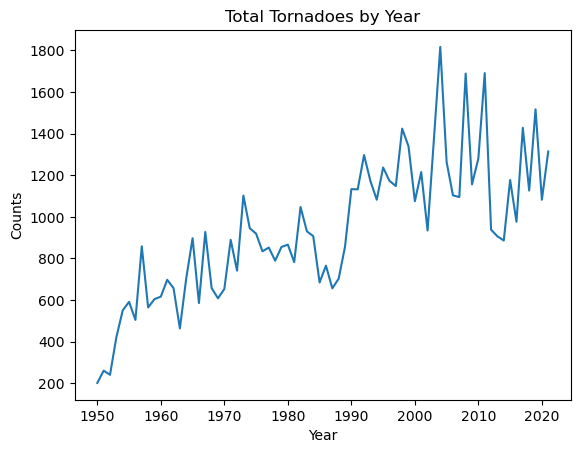

In [212]:
# Lineplot to show the trend of tornadoes of all magnitudes throughout the year
sns.lineplot(data=year, x='yr', y='mag')
plt.title('Total Tornadoes by Year')
plt.xlabel('Year')
plt.ylabel('Counts')

In [29]:
# Which and how many tornadoes have an unknown magnitude
print(tornadoes_df[tornadoes_df['mag']==-9])

         yr  mo  dy       date  st  mag  inj  fat     slat      slon     elat  \
60343  2016   4  15 2016-04-15  CO   -9    0    0  38.3743 -102.8185  38.4299   
60344  2016   4  15 2016-04-15  CO   -9    0    0  38.4046 -102.8083  38.4118   
60345  2016   4  15 2016-04-15  CO   -9    0    0  38.4773 -102.7234  38.4944   
60346  2016   4  15 2016-04-15  CO   -9    0    0  38.1773 -102.7907  38.1852   
60480  2016   5   8 2016-05-08  OK   -9    0    0  34.5810  -98.0760  34.5810   
...     ...  ..  ..        ...  ..  ...  ...  ...      ...       ...      ...   
67417  2021  12  15 2021-12-15  IA   -9    0    0  41.9551  -95.5749  42.0074   
67418  2021  12  15 2021-12-15  IA   -9    0    0  42.5620  -95.4050  42.5850   
67419  2021  12  15 2021-12-15  IA   -9    0    0  42.2525  -94.6317  42.2708   
67420  2021  12  15 2021-12-15  IA   -9    0    0  42.5797  -94.5775  42.5920   
67421  2021  12  15 2021-12-15  IA   -9    0    0  42.6852  -94.5062  42.7726   

           elon   len  wid 

In [30]:
# Which tornado had the longest length of track in miles
longtrack = tornadoes_df[tornadoes_df.len==tornadoes_df.len.max()]
longtrack

yr  mo  dy       date  st  mag  inj  fat  slat   slon   elat   elon  \
764  1953   3  22 1953-03-22  LA    2   22    2  31.1 -93.22  33.52 -90.87   

       len  wid  
764  234.7  200

In [31]:
# Which tornado had the largest width in yards?
widest = tornadoes_df[tornadoes_df.len==tornadoes_df.len.max()]
widest

yr  mo  dy       date  st  mag  inj  fat  slat   slon   elat   elon  \
764  1953   3  22 1953-03-22  LA    2   22    2  31.1 -93.22  33.52 -90.87   

       len  wid  
764  234.7  200

In [32]:
# Was this tornado the deadliest?

deadliest = tornadoes_df[tornadoes_df.fat==tornadoes_df.fat.max()]
deadliest

yr  mo  dy       date  st  mag   inj  fat     slat     slon     elat  \
55529  2011   5  22 2011-05-22  MO    5  1150  158  37.0524 -94.5932  36.9838   

          elon    len   wid  
55529 -94.2213  21.62  1600

** The same tornado was the widest and longest in track but it did not bring most fatalities.

In [213]:
# Which tornado caused the most injuries?
injuries = tornadoes_df[tornadoes_df.inj==tornadoes_df.inj.max()]
injuries

yr  mo  dy       date  st  mag   inj  fat   slat   slon   elat  \
19464  1979   4  10 1979-04-10  TX    4  1740   42  33.82 -98.65  34.18   

        elon   len   wid  
19464 -97.98  46.9  1320

In [26]:
# Mapping tornadoes in 2004 with magnitudes 2-5
import pandas as pd
import folium
from branca.colormap import LinearColormap

# Filter tornadoes for the year 2004
tornadoes_2004 = tornadoes_df[tornadoes_df['yr'] == 2004]

# Sort the tornadoes by magnitude in descending order
highest_magnitude_tornadoes_2004 = tornadoes_2004.sort_values('mag', ascending=False)

# Select the locations with highest magnitude tornadoes in 2004
locations_highest_magnitude_2004 = highest_magnitude_tornadoes_2004[['st', 'slat', 'slon', 'mag']]

# Create a color map for magnitudes
colormap = LinearColormap(['green', 'yellow', 'orange', 'red'], vmin=2, vmax=5)

# Create a map centered around the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for the locations with highest magnitude tornadoes in 2004
for index, row in locations_highest_magnitude_2004.iterrows():
    lat, lon = row['slat'], row['slon']
    state = row['st']
    magnitude = row['mag']
    tooltip = f"State: {state}<br>Magnitude: {magnitude}"
    
    # Determine the icon color based on the magnitude
    color = colormap(magnitude)
    
    # Create a custom HTML icon
    html_icon = f'<i class="fa fa-cloud" style="color:{color};"></i>'
    
    folium.Marker(
        [lat, lon],
        icon=folium.DivIcon(html=html_icon),
        tooltip=tooltip
    ).add_to(us_map)

# Add the color map to the map
colormap.caption = 'Magnitude'
colormap.add_to(us_map)

# Display the map
us_map


In [33]:
#In which locations tornadoes are with highest magnitude in 2004?
highest_magnitude_tornadoes = tornadoes_df.sort_values('mag', ascending=False)
locations_highest_magnitude = highest_magnitude_tornadoes[['st', 'slat', 'slon']]

In [34]:
#pip install folium

In [35]:
#pip install folium
import folium
from folium.plugins import HeatMap

#Frequency and severity of tornadoes in the particular region based on the US map.

# Filter the tornadoes based on the specified criteria
filtered_tornadoes = tornadoes_df[
    (tornadoes_df['mo'].isin([ 4, 5, 6, 7])) &     # Months: Mar, Apr, May, Jun, Jul, Aug
    (tornadoes_df['yr'].between(2008, 2020)) &         # Years: 2008 to 2020 (inclusive)
    (tornadoes_df['mag'].isin([2, 3, 4, 5]))           # Magnitudes: 2, 3, 4, 5
]

# Create a map centered around the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Generate a HeatMap based on the filtered tornado locations
heat_data = [[row['slat'], row['slon']] for index, row in filtered_tornadoes.iterrows()]
HeatMap(heat_data).add_to(us_map)

# Display the map
us_map

In [214]:
#tornadoes_reg_data = tornadoes_df[['slat', 'slon', 'len', 'wid', 'fat', 'inj']].copy()
tornadoes_reg_data.dropna(inplace=True)  # Drop rows with missing values
X = tornadoes_reg_data[['slat', 'slon', 'len', 'wid']]
y_fat = tornadoes_reg_data['fat']
y_inj = tornadoes_reg_data['inj']
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Add a constant column to the input features
X = sm.add_constant(X)

#Create and fit a linear regression model for fatalities
regressor_fat = sm.OLS(y_fat, X)
result_fat = regressor_fat.fit()

#Create and fit a linear regression model for injuries
regressor_inj = sm.OLS(y_inj, X)
result_inj = regressor_inj.fit()

#Print the regression results for fatalities
print("Regression Results for Fatalities:")
print(result_fat.summary())

#Print the regression results for injuries
print("Regression Results for Injuries:")
print(result_inj.summary())

Regression Results for Fatalities:
                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:30:23   Log-Likelihood:            -1.2025e+05
No. Observations:               67558   AIC:                         2.405e+05
Df Residuals:                   67553   BIC:                         2.406e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

In [37]:
#By looking at the regression analysis we can see that  P>|t| which is the p value for all variables and the intercept in Regression Results for Fatalities are higher than 0.05, therefore the slat, slon, len and wid have either no affect of aftalities or there is strong coorelation netween them. 
#By looking at the sign of the coefficients, we can see that it is negative, so as the statring latitude increases, the number of fatalities decrease as they are negatively coorelated. 
#By looking at the regression analysis we can see that  P>|t| which is the p value for all variables and the intercept in Regression Results for Injuries are higher than 0.05, therefore the slat, slon, len and wid have either no affect of aftalities or there is strong coorelation netween them. 
#By looking at the sign of the coefficients, we can see that it is negative, so as the statring latitude increases, the number of fatalities decrease as they are negatively coorelated.
#Also, by looking at the r-squared in the Regression Results for Fatalities, we can see that the results have 35% of being incorrect, but by looking at the R-squared and the adjusted r-squared, we can see that this regr4ession analysis has smaller possible error. 
#Thus we can say that slat, slon, len and wid are not statistically significant for the number of injuries or the number of fatalities. 

In [38]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
# read birds csv file into pandas dataframe
birds_df = pd.read_csv("./birds_united_states.csv")
birds_df


id          gen          sp  ssp                            en  \
0      527379  Dendrocygna  autumnalis  NaN  Black-bellied Whistling Duck   
1      480387  Dendrocygna  autumnalis  NaN  Black-bellied Whistling Duck   
2      316537  Dendrocygna  autumnalis  NaN  Black-bellied Whistling Duck   
3      192058  Dendrocygna  autumnalis  NaN  Black-bellied Whistling Duck   
4      172910  Dendrocygna  autumnalis  NaN  Black-bellied Whistling Duck   
...       ...          ...         ...  ...                           ...   
53274  191766      Mystery     mystery  NaN              Identity unknown   
53275  191763      Mystery     mystery  NaN              Identity unknown   
53276  185561      Mystery     mystery  NaN              Identity unknown   
53277  180184      Mystery     mystery  NaN              Identity unknown   
53278  178905      Mystery     mystery  NaN              Identity unknown   

                   rec            cnt  \
0      Thomas Magarian  United States   
1            Russ Wigh  United States   
2           Jim Holmes  United States   
3          Paul Marvin  United States   
4          Paul Marvin  United States   
...                ...            ...   
53274      Kelley Nunn  United States   
53275      Kelley Nunn  United States   
53276     Jeff Calhoun  United States   
53277  Timothy Boucher  United States   
53278       Alan Bragg  United States   

                                                     loc      lat      lng  \
0      Circle B Bar Reserve, Lakeland, Polk County, F...  27.9901 -81.8658   
1                      Savannah, Chatham County, Georgia  31.9643 -81.0152   
2               Chalkley Road, Cameron Parish, Louisiana  30.0237 -93.0578   
3      Orlando Wetlands, Christmas, Orange County, Fl...  28.5785 -80.9961   
4      Orlando Wetlands, Christmas, Orange County, Fl...  28.5785 -80.9961   
...                                                  ...      ...      ...   
53274  East Marlborough (near  Kennett Square), Chest...  39.8569 -75.7158   
53275  Kennett (near  Kennett Square), Chester County...  39.8534 -75.7137   
53276    Rockford (near  Derby), Sedgwick County, Kansas  37.5565 -97.2807   
53277  Marshall (near  Markham), Fauquier County, Vir...  38.9698 -77.9865   
53278  Great Meadows National Wildlife Refuge, Concor...  42.4750 -71.3290   

       ...                                           lic         q length  \
0      ...  //creativecommons.org/licenses/by-nc-sa/4.0/  no score   0:35   
1      ...  //creativecommons.org/licenses/by-nc-sa/4.0/         A   0:35   
2      ...  //creativecommons.org/licenses/by-nc-sa/4.0/         A   0:07   
3      ...  //creativecommons.org/licenses/by-nc-sa/4.0/         A   0:19   
4      ...  //creativecommons.org/licenses/by-nc-sa/4.0/         A   1:18   
...    ...                                           ...       ...    ...   
53274  ...  //creativecommons.org/licenses/by-nc-sa/4.0/         E   0:02   
53275  ...  //creativecommons.org/licenses/by-nc-sa/4.0/         E   0:01   
53276  ...  //creativecommons.org/licenses/by-nc-sa/4.0/         E   0:14   
53277  ...  //creativecommons.org/licenses/by-nc-sa/4.0/         E   0:05   
53278  ...  //creativecommons.org/licenses/by-nc-sa/4.0/         E   0:10   

        time        date    uploaded  \
0      12:35  2019-01-14  2020-02-12   
1      07:30  2019-06-08  2019-06-10   
2      18:00  2016-05-14  2016-05-15   
3      06:47  2014-06-08  2014-08-21   
4      11:00  2014-03-23  2014-04-08   
...      ...         ...         ...   
53274  05:30  2014-08-18  2014-08-20   
53275  05:30  2014-08-18  2014-08-20   
53276  05:00  2014-06-29  2014-07-06   
53277  11:30  2014-05-25  2014-05-31   
53278  11:30  2014-05-20  2014-05-20   

                                                    also  \
0                                                   ['']   
1                                                   ['']   
2                                                   ['']   
3         

In [39]:
# double-check for missing values in dataset
print(birds_df.isnull().sum())


id                   0
gen                  0
sp                   0
ssp              44767
en                   0
rec                  0
cnt                  0
loc                170
lat               1018
lng               1018
alt                499
type                 0
url                  0
file               170
file-name          170
sono                 0
lic                  0
q                    0
length               0
time                 0
date                 0
uploaded             0
also                 0
rmk              14400
bird-seen            0
playback-used        0
dtype: int64


In [40]:
# Remove the "ssp" and "rmk" columns because of many missed values and columns are not needed.
birds_df = birds_df.drop(columns=["ssp", "rmk"])
# Remove rows with missing values in "file" and "file-name" columns
birds_df = birds_df.dropna(subset=["file", "file-name", "loc", "lat", "lng", "alt"])
# double-check for missing values in dataset
#print(birds_df.isnull().sum())

In [41]:
# Convert date column to datetime format
birds_df['date'] = pd.to_datetime(birds_df['date'], errors='coerce')
print(birds_df.dtypes) #check data types for each column
print(birds_df.describe())

id                        int64
gen                      object
sp                       object
en                       object
rec                      object
cnt                      object
loc                      object
lat                     float64
lng                     float64
alt                      object
type                     object
url                      object
file                     object
file-name                object
sono                     object
lic                      object
q                        object
length                   object
time                     object
date             datetime64[ns]
uploaded                 object
also                     object
bird-seen                object
playback-used            object
dtype: object
                  id           lat           lng
count   51779.000000  51779.000000  51779.000000
mean   283653.771336     37.837946   -103.310471
std    158781.656899      8.231858     21.841633
min      1133.000000  

In [42]:
# Splitting the "loc" column by the last comma into "loc" and "state"
birds_df[['state', 'loc']] = birds_df['loc'].str.rsplit(',', n=1, expand=True)
print(birds_df.head())

       id          gen          sp                            en  \
0  527379  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
1  480387  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
2  316537  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
3  192058  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
4  172910  Dendrocygna  autumnalis  Black-bellied Whistling Duck   

               rec            cnt         loc      lat      lng alt  ...  \
0  Thomas Magarian  United States     Florida  27.9901 -81.8658  30  ...   
1        Russ Wigh  United States     Georgia  31.9643 -81.0152  10  ...   
2       Jim Holmes  United States   Louisiana  30.0237 -93.0578   0  ...   
3      Paul Marvin  United States     Florida  28.5785 -80.9961   0  ...   
4      Paul Marvin  United States     Florida  28.5785 -80.9961   0  ...   

                                            lic         q length   time  \
0  //creativecommons.org/licenses/by-nc-sa/4.0/  no score  

In [43]:
# Rename the columns
birds_df = birds_df.rename(columns={'loc': 'state', 'state': 'loc'})
# Print the updated DataFrame
print(birds_df.head())

       id          gen          sp                            en  \
0  527379  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
1  480387  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
2  316537  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
3  192058  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
4  172910  Dendrocygna  autumnalis  Black-bellied Whistling Duck   

               rec            cnt       state      lat      lng alt  ...  \
0  Thomas Magarian  United States     Florida  27.9901 -81.8658  30  ...   
1        Russ Wigh  United States     Georgia  31.9643 -81.0152  10  ...   
2       Jim Holmes  United States   Louisiana  30.0237 -93.0578   0  ...   
3      Paul Marvin  United States     Florida  28.5785 -80.9961   0  ...   
4      Paul Marvin  United States     Florida  28.5785 -80.9961   0  ...   

                                            lic         q length   time  \
0  //creativecommons.org/licenses/by-nc-sa/4.0/  no score  

In [44]:
import re

abbr_to_full = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii','HA':'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}
pattern = r'\b(' + '|'.join(abbr_to_full.keys()) + r')\b'
birds_df['state'] = birds_df['state'].str.replace(pattern, lambda x: abbr_to_full[x.group()], regex=True)
print(birds_df.isnull().sum())

id                 0
gen                0
sp                 0
en                 0
rec                0
cnt                0
state            901
lat                0
lng                0
alt                0
type               0
url                0
file               0
file-name          0
sono               0
lic                0
q                  0
length             0
time               0
date             133
uploaded           0
also               0
bird-seen          0
playback-used      0
loc                0
dtype: int64


In [45]:
# Remove rows with missing values in "file" and "file-name" columns
birds_df = birds_df.dropna(subset=["state", "date"])
# double-check for missing values in dataset
# birds_df.isnull().sum
print(birds_df.isnull().sum())

id               0
gen              0
sp               0
en               0
rec              0
cnt              0
state            0
lat              0
lng              0
alt              0
type             0
url              0
file             0
file-name        0
sono             0
lic              0
q                0
length           0
time             0
date             0
uploaded         0
also             0
bird-seen        0
playback-used    0
loc              0
dtype: int64


In [46]:
print(birds_df['gen'].value_counts())#Count the unique values in categorical columns

Setophaga       2782
Vireo           1632
Empidonax       1188
Mystery          905
Pipilo           904
                ... 
Tetraogallus       1
Alopecoenas        1
Gallus             1
Hydrocoloeus       1
Amandava           1
Name: gen, Length: 368, dtype: int64


In [47]:
filtered_df = birds_df[birds_df['cnt'] == 'United States']
print(filtered_df.head())

       id          gen          sp                            en  \
0  527379  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
1  480387  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
2  316537  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
3  192058  Dendrocygna  autumnalis  Black-bellied Whistling Duck   
4  172910  Dendrocygna  autumnalis  Black-bellied Whistling Duck   

               rec            cnt       state      lat      lng alt  ...  \
0  Thomas Magarian  United States     Florida  27.9901 -81.8658  30  ...   
1        Russ Wigh  United States     Georgia  31.9643 -81.0152  10  ...   
2       Jim Holmes  United States   Louisiana  30.0237 -93.0578   0  ...   
3      Paul Marvin  United States     Florida  28.5785 -80.9961   0  ...   
4      Paul Marvin  United States     Florida  28.5785 -80.9961   0  ...   

                                            lic         q length   time  \
0  //creativecommons.org/licenses/by-nc-sa/4.0/  no score  

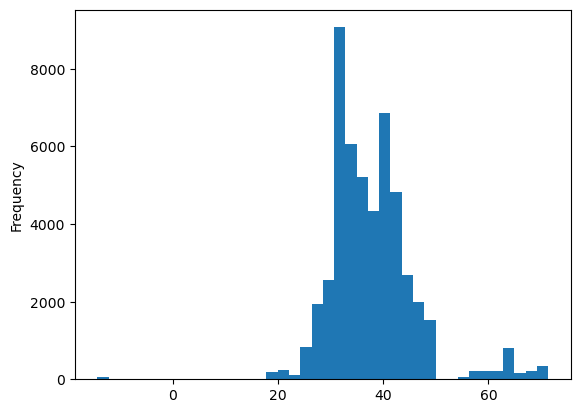

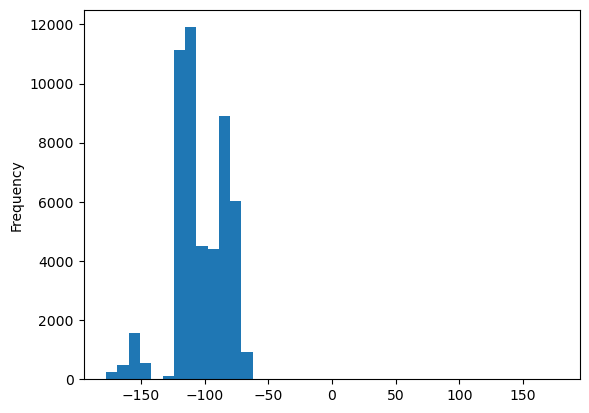

In [48]:
import matplotlib.pyplot as plt

birds_df['lat'].plot.hist(bins=40)
plt.show()

birds_df['lng'].plot.hist(bins=40)
plt.show()

<Figure size 3000x600 with 0 Axes>

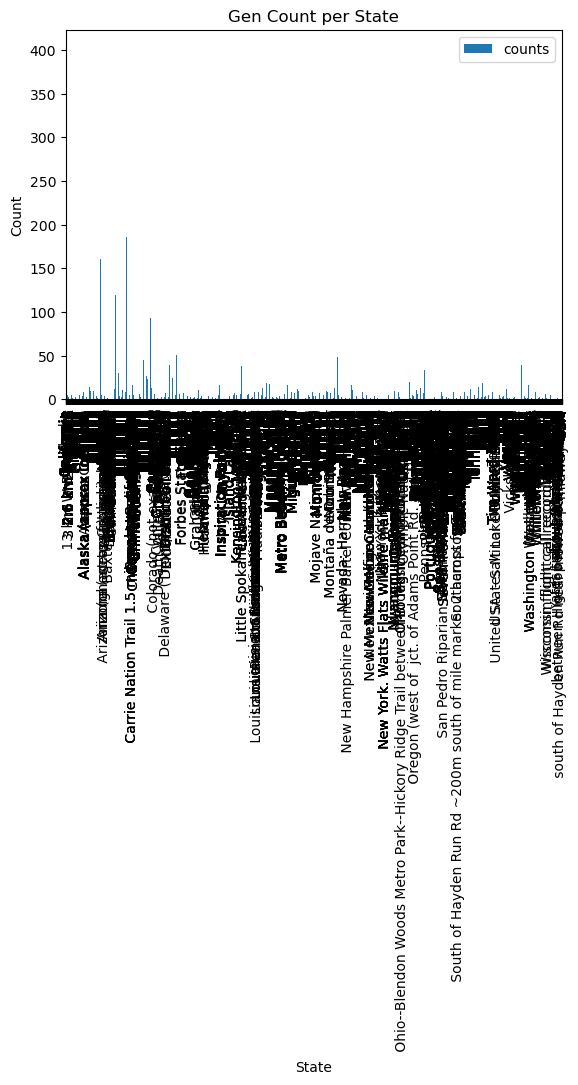

In [49]:
import matplotlib.pyplot as plt

# Group the data by 'state' and 'gen', and get the counts
state_gen_counts = birds_df.groupby(['state', 'gen']).size().reset_index(name='counts')

# Plot the barplot
plt.figure(figsize=(30, 6))
state_gen_counts.plot.bar(x='state', y='counts')

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Gen Count per State')

# Show the plot
plt.show()

In [50]:
 # focus on only US mainland
filtered_df = filtered_df.loc[(filtered_df.lat >= 25) & (filtered_df.lat <= 50) & (filtered_df.lng >= -125) & (filtered_df.lng <= -70)]

In [51]:
# Group bird data by year
yeargroup = birds_df.groupby(birds_df.date.dt.year).agg({'count'})
yeargroup

id   gen    sp    en   rec   cnt state   lat   lng   alt  ...   lic  \
     count count count count count count count count count count  ... count   
date                                                              ...         
1975     1     1     1     1     1     1     1     1     1     1  ...     1   
1976     2     2     2     2     2     2     2     2     2     2  ...     2   
1977     2     2     2     2     2     2     2     2     2     2  ...     2   
1983     1     1     1     1     1     1     1     1     1     1  ...     1   
1985     4     4     4     4     4     4     4     4     4     4  ...     4   
1987     4     4     4     4     4     4     4     4     4     4  ...     4   
1988    14    14    14    14    14    14    14    14    14    14  ...    14   
1989     2     2     2     2     2     2     2     2     2     2  ...     2   
1990    99    99    99    99    99    99    99    99    99    99  ...    99   
1991    23    23    23    23    23    23    23    23    23    23  ...    23   
1992    50    50    50    50    50    50    50    50    50    50  ...    50   
1993    35    35    35    35    35    35    35    35    35    35  ...    35   
1994    69    69    69    69    69    69    69    69    69    69  ...    69   
1995   374   374   374   374   374   374   374   374   374   374  ...   374   
1996    69    69    69    69    69    69    69    69    69    69  ...    69   
1997   140   140   140   140   140   140   140   140   140   140  ...   140   
1998    89    89    89    89    89    89    89    89    89    89  ...    89   
1999   105   105   105   105   105   105   105   105   105   105  ...   105   
2000   279   279   279   279   279   279   279   279   279   279  ...   279   
2001   167   167   167   167   167   167   167   167   167   167  ...   167   
2002    53    53    53    53    53    53    53    53    53    53  ...    53   
2003    15    15    15    15    15    15    15    15    15    15  ...    15   
2004    47    47    47    47    47    47    47    47    47    47  ...    47   
2005    89    89    89    89    89    89    89    89    89    89  ...    89   
2006   160   160   160   160   160   160   160   160   160   160  ...   160   
2007  1106  1106  1106  1106  1106  1106  1106  1106  1106  1106  ...  1106   
2008  1204  1204  1204  1204  1204  1204  1204  1204  1204  1204  ...  1204   
2009  1358  1358  1358  1358  1358  1358  1358  1358  1358  1358  ...  1358   
2010  1613  1613  1613  1613  1613  1613  1613  1613  1613  1613  ...  1613   
2011  2354  2354  2354  2354  2354  2354  2354  2354  2354  2354  ...  2354   
2012  3817  3817  3817  3817  3817  3817  3817  3817  3817  3817  ...  3817   
2013  4938  4938  4938  4938  4938  4938  4938  4938  4938  4938  ...  4938   
2014  4665  4665  4665  4665  4665  4665  4665  4665  4665  4665  ...  4665   
2015  6839  6839  6839  6839  6839  6839  6839  6839  6839  6839  ...  6839   
2016  5426  5426  5426  5426  5426  5426  5426  5426  5426  5426  ...  5426   
2017  4564  4564  4564  4564  4564  4564  4564  4564  4564  4564  ...  4564   
2018  4174  4174  4174  4174  4174  4174  4174  4174  4174  4174  ...  4174   
2019  3519  3519  3519  3519  3519  3519  3519  3519  3519  3519  ...  3519   
2020  3286  3286  3286  3286  3286  3286  3286  3286  3286  3286  ...  3286   

         q length  time  date uploaded  also bird-seen playback-used   loc  
     count  count count count    count count     count         count count  
date                                                                        
1975     1      1     1     1        1     1         1             1     1  
1976     2      2     2     2        2     2         2             2     2  
1977     2      2     2     2        2     2         2             2     2  
1983     1      1     1     1        1     1         1             1     1  
1985     4      4     4     4        4     4         4             4     4  
1987     4      4     4     4        4     4         4             4     

In [52]:
# in which year do we have the most bird recordings and how many

print(yeargroup.max())
yeargroup.idxmax()

id             count    6839
gen            count    6839
sp             count    6839
en             count    6839
rec            count    6839
cnt            count    6839
state          count    6839
lat            count    6839
lng            count    6839
alt            count    6839
type           count    6839
url            count    6839
file           count    6839
file-name      count    6839
sono           count    6839
lic            count    6839
q              count    6839
length         count    6839
time           count    6839
date           count    6839
uploaded       count    6839
also           count    6839
bird-seen      count    6839
playback-used  count    6839
loc            count    6839
dtype: int64


id             count    2015
gen            count    2015
sp             count    2015
en             count    2015
rec            count    2015
cnt            count    2015
state          count    2015
lat            count    2015
lng            count    2015
alt            count    2015
type           count    2015
url            count    2015
file           count    2015
file-name      count    2015
sono           count    2015
lic            count    2015
q              count    2015
length         count    2015
time           count    2015
date           count    2015
uploaded       count    2015
also           count    2015
bird-seen      count    2015
playback-used  count    2015
loc            count    2015
dtype: int64

In [53]:
# extract the entries for 2015 in original dataset
birds2015 = birds_df[birds_df['date'].dt.strftime('%Y')=='2015']
birds2015.head(100)

id           gen            sp                            en  \
14    278896   Dendrocygna    autumnalis  Black-bellied Whistling Duck   
15    254938   Dendrocygna    autumnalis  Black-bellied Whistling Duck   
16    237780   Dendrocygna    autumnalis  Black-bellied Whistling Duck   
17    235152   Dendrocygna    autumnalis  Black-bellied Whistling Duck   
39    267759   Dendrocygna       bicolor        Fulvous Whistling Duck   
...      ...           ...           ...                           ...   
966   437817  Histrionicus  histrionicus                Harlequin Duck   
1006  354745      Clangula      hyemalis              Long-tailed Duck   
1008  276943      Clangula      hyemalis              Long-tailed Duck   
1009  276941      Clangula      hyemalis              Long-tailed Duck   
1010  276940      Clangula      hyemalis              Long-tailed Duck   

                     rec            cnt       state      lat       lng  alt  \
14           Paul Marvin  United States     Florida  28.2290  -80.8130    0   
15            Nick Komar  United States       Texas  28.6835  -96.1102   10   
16              Dan Lane  United States   Louisiana  29.7776  -93.2776    0   
17    Danny Zapata-Henao  United States       Texas  29.5898  -95.6465   20   
39           Paul Marvin  United States     Florida  27.8338  -80.7080   10   
...                  ...            ...         ...      ...       ...  ...   
966          Paul Marvin  United States   Minnesota  47.7069  -90.5234  190   
1006       Frank Lambert  United States      Alaska  64.8214 -166.0081  300   
1008       Frank Lambert  United States      Alaska  71.2564 -156.5514    0   
1009       Frank Lambert  United States      Alaska  71.2564 -156.5514    0   
1010       Frank Lambert  United States      Alaska  71.2564 -156.5514    0   

      ...                                           lic  q length   time  \
14    ...  //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:16  08:31   
15    ...  //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:21  07:15   
16    ...  //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:11  19:00   
17    ...  //creativecommons.org/licenses/by-nc-sa/4.0/  B   1:19  20:28   
39    ...  //creativecommons.org/licenses/by-nc-sa/4.0/  B   1:01  08:06   
...   ...                                           ... ..    ...    ...   
966   ...  //creativecommons.org/licenses/by-nc-sa/4.0/  C   0:11  12:29   
1006  ...  //creativecommons.org/licenses/by-nc-nd/4.0/  B   0:04  06:28   
1008  ...  //creativecommons.org/licenses/by-nc-nd/4.0/  B   0:38  11:49   
1009  ...  //creativecommons.org/licenses/by-nc-nd/4.0/  B   0:08  12:30   
1010  ...  //creativecommons.org/licenses/by-nc-nd/4.0/  B   0:38  12:06   

           date    uploaded  \
14   2015-08-28  2015-09-13   
15   2015-04-12  2015-07-03   
16   2015-04-20  2015-04-29   
17   2015-04-10  2015-04-11   
39   2015-07-29  2015-08-13   
...         ...         ...   
966  2015-10-20  2018-10-10   
1006 2015-06-03  2017-02-08   
1008 2015-06-14  2015-08-30   
1009 2015-06-12  2015-08-30   
1010 2015-06-12  2015-08-30   

                                                   also bird-seen  \
14                                                 ['']       yes   
15    ['Cistothorus stellaris', 'Cardinalis cardinal...       yes   
16                              ['Agelaius phoeniceus']       yes   
17                                                 ['']       yes   
39             ['Aramus guarauna', 'Gallinula galeata']       yes   
...                                                 ...       ...   
966                                                ['']       yes   
1006                                               ['']       yes   
1008                                               ['']       yes   
1009                                               ['']       yes   
1010                                               ['']       yes   

     playback-used                                       

In [54]:
# extract the entries for 2008 in original dataset
birds2008 = birds_df[birds_df['date'].dt.strftime('%Y')=='2008']
birds2008.head(100)

id       gen           sp                      en             rec  \
116    21970    Branta   canadensis            Canada Goose   Chris Parrish   
117    21786    Branta   canadensis            Canada Goose   Chris Parrish   
153    97248    Branta   canadensis            Canada Goose     Daniel Lane   
155    31862    Branta   canadensis            Canada Goose    James Eckert   
436   277704    Cygnus   buccinator          Trumpeter Swan     Jesse Fagan   
...      ...       ...          ...                     ...             ...   
5690   21828    Limosa        fedoa          Marbled Godwit   Chris Parrish   
5691   21827    Limosa        fedoa          Marbled Godwit   Chris Parrish   
6034   56428  Calidris    minutilla         Least Sandpiper     Mike Nelson   
6035   53850  Calidris    minutilla         Least Sandpiper     Mike Nelson   
6054   35380  Calidris  fuscicollis  White-rumped Sandpiper  Andrew Spencer   

                cnt            state        lat         lng   alt  ...  \
116   United States          Wyoming  43.855600 -110.264500  2114  ...   
117   United States          Wyoming  43.871400 -110.478100  2077  ...   
153   United States   North Carolina  36.463000  -81.339000   800  ...   
155   United States     Berks County  40.370351  -76.032085    90  ...   
436   United States           Alaska  63.069200 -151.007000   800  ...   
...             ...              ...        ...         ...   ...  ...   
5690  United States          Montana  47.697300 -112.049500  1645  ...   
5691  United States          Montana  47.697300 -112.049500  1645  ...   
6034  United States        Tennessee  35.912000  -84.510100   100  ...   
6035  United States        Tennessee  35.912000  -84.510100   100  ...   
6054  United States          Arizona  32.255056 -109.837017     ?  ...   

                                               lic  q length     time  \
116   //creativecommons.org/licenses/by-nc-nd/2.5/  A   0:13    09:00   
117   //creativecommons.org/licenses/by-nc-nd/2.5/  A   0:57    06:47   
153   //creativecommons.org/licenses/by-nc-nd/2.5/  B   0:33    12:45   
155   //creativecommons.org/licenses/by-nc-nd/2.5/  B   0:18    15:58   
436   //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:23    10:00   
...                                            ... ..    ...      ...   
5690  //creativecommons.org/licenses/by-nc-nd/2.5/  B   0:18    17:32   
5691  //creativecommons.org/licenses/by-nc-nd/2.5/  B   0:53    17:30   
6034  //creativecommons.org/licenses/by-nc-sa/3.0/  C   0:04  10:00am   
6035  //creativecommons.org/licenses/by-nc-sa/3.0/  C   0:30  10:30am   
6054  //creativecommons.org/licenses/by-nc-nd/2.5/  B   0:08    12:00   

           date    uploaded                                          also  \
116  2008-06-07  2008-11-20                                          ['']   
117  2008-06-08  2008-11-20                                          ['']   
153  2008-01-05  2012-03-23                         ['Melospiza melodia']   
155  2008-03-30  2009-03-31                                          ['']   
436  2008-06-08  2015-09-04  ['Melospiza lincolnii', 'Setophaga striata']   
...         ...         ...                                           ...   
5690 2008-06-23  2008-11-20             ['Xanthocephalus xanthocephalus']   
5691 2008-06-23  2008-11-20             ['Xanthocephalus xanthocephalus']   
6034 2008-09-06  2010-06-22                                          ['']   
6035 2008-08-12  2010-05-31                                          ['']   
6054 2008-06-01  2009-06-09                                          ['']   

     bird-seen playback-used                             loc  
116    unknown       unknown  Buffalo Fork, Bridger-Teton NF  
117    unknown       unknown   Pacific Creek, Grand Teton NP  
153    unknown       unknown        New River St Pk, Ashe Co  
155    unknown       unknown  Blue Marsh Lake Stilling Basin  
436        yes       unknown                          D

In [55]:
#Greatest fatalities by state in 2008

from branca.colormap import LinearColormap

# Filter tornadoes for the year 2008
tornadoes_2008 = tornadoes_df[tornadoes_df['yr'] == 2008]

# Group by state and calculate the sum of fatalities
fatalities_by_state = tornadoes_2008.groupby('st')['fat'].sum().reset_index()

# Sort the dataframe in descending order based on fatalities
fatalities_by_state.sort_values('fat', ascending=False, inplace=True)

# Create a color map for fatalities
colormap = LinearColormap(['green', 'yellow', 'orange', 'red'], vmin=fatalities_by_state['fat'].min(), vmax=fatalities_by_state['fat'].max())

# Create a map centered around the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for the highest fatalities by state in 2008
for index, row in fatalities_by_state.iterrows():
    state = row['st']
    fatalities = row['fat']
    tooltip = f"State: {state}<br>Fatalities: {fatalities}"
    
    # Determine the icon color based on the number of fatalities
    color = colormap(fatalities)
    
    # Create a custom HTML icon
    html_icon = f'<i class="fa fa-map-marker" style="color:{color};"></i>'
    
    # Get the latitude and longitude coordinates of the state
    lat, lon = tornadoes_df.loc[tornadoes_df['st'] == state, ['slat', 'slon']].iloc[0]
    
    folium.Marker(
        [lat, lon],
        icon=folium.DivIcon(html=html_icon),
        tooltip=tooltip
    ).add_to(us_map)

# Add the color map to the map
colormap.caption = 'Fatalities'
colormap.add_to(us_map)

# Display the map
us_map



In [56]:
#Greatest fatalities by state in 2015

from branca.colormap import LinearColormap

# Filter tornadoes for the year 2015
tornadoes_2015 = tornadoes_df[tornadoes_df['yr'] == 2015]

# Group by state and calculate the sum of fatalities
fatalities_by_state2015 = tornadoes_2015.groupby('st')['fat'].sum().reset_index()

# Sort the dataframe in descending order based on fatalities
fatalities_by_state2015.sort_values('fat', ascending=False, inplace=True)

# Create a color map for fatalities
colormap = LinearColormap(['green', 'yellow', 'orange', 'red'], vmin=fatalities_by_state2015['fat'].min(), vmax=fatalities_by_state2015['fat'].max())

# Create a map centered around the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for the highest fatalities by state in 2015
for index, row in fatalities_by_state2015.iterrows():
    state = row['st']
    fatalities = row['fat']
    tooltip = f"State: {state}<br>Fatalities: {fatalities}"
    
    # Determine the icon color based on the number of fatalities
    color = colormap(fatalities)
    
    # Create a custom HTML icon
    html_icon = f'<i class="fa fa-map-marker" style="color:{color};"></i>'
    
    # Get the latitude and longitude coordinates of the state
    lat, lon = tornadoes_df.loc[tornadoes_df['st'] == state, ['slat', 'slon']].iloc[0]
    
    folium.Marker(
        [lat, lon],
        icon=folium.DivIcon(html=html_icon),
        tooltip=tooltip
    ).add_to(us_map)

# Add the color map to the map
colormap.caption = 'Fatalities'
colormap.add_to(us_map)

# Display the map
us_map


In [57]:
#pip install us
import pandas as pd
import us

# Add the 'st' column with state abbreviations
birds_df['st'] = birds_df['state'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

# Extract the entries for 2008 in the original dataset
birds2008 = birds_df[birds_df['date'].dt.year == 2008]
birds2008.head(100)

id       gen           sp                      en             rec  \
116    21970    Branta   canadensis            Canada Goose   Chris Parrish   
117    21786    Branta   canadensis            Canada Goose   Chris Parrish   
153    97248    Branta   canadensis            Canada Goose     Daniel Lane   
155    31862    Branta   canadensis            Canada Goose    James Eckert   
436   277704    Cygnus   buccinator          Trumpeter Swan     Jesse Fagan   
...      ...       ...          ...                     ...             ...   
5690   21828    Limosa        fedoa          Marbled Godwit   Chris Parrish   
5691   21827    Limosa        fedoa          Marbled Godwit   Chris Parrish   
6034   56428  Calidris    minutilla         Least Sandpiper     Mike Nelson   
6035   53850  Calidris    minutilla         Least Sandpiper     Mike Nelson   
6054   35380  Calidris  fuscicollis  White-rumped Sandpiper  Andrew Spencer   

                cnt            state        lat         lng   alt  ...  q  \
116   United States          Wyoming  43.855600 -110.264500  2114  ...  A   
117   United States          Wyoming  43.871400 -110.478100  2077  ...  A   
153   United States   North Carolina  36.463000  -81.339000   800  ...  B   
155   United States     Berks County  40.370351  -76.032085    90  ...  B   
436   United States           Alaska  63.069200 -151.007000   800  ...  B   
...             ...              ...        ...         ...   ...  ... ..   
5690  United States          Montana  47.697300 -112.049500  1645  ...  B   
5691  United States          Montana  47.697300 -112.049500  1645  ...  B   
6034  United States        Tennessee  35.912000  -84.510100   100  ...  C   
6035  United States        Tennessee  35.912000  -84.510100   100  ...  C   
6054  United States          Arizona  32.255056 -109.837017     ?  ...  B   

     length     time       date    uploaded  \
116    0:13    09:00 2008-06-07  2008-11-20   
117    0:57    06:47 2008-06-08  2008-11-20   
153    0:33    12:45 2008-01-05  2012-03-23   
155    0:18    15:58 2008-03-30  2009-03-31   
436    0:23    10:00 2008-06-08  2015-09-04   
...     ...      ...        ...         ...   
5690   0:18    17:32 2008-06-23  2008-11-20   
5691   0:53    17:30 2008-06-23  2008-11-20   
6034   0:04  10:00am 2008-09-06  2010-06-22   
6035   0:30  10:30am 2008-08-12  2010-05-31   
6054   0:08    12:00 2008-06-01  2009-06-09   

                                              also bird-seen playback-used  \
116                                           ['']   unknown       unknown   
117                                           ['']   unknown       unknown   
153                          ['Melospiza melodia']   unknown       unknown   
155                                           ['']   unknown       unknown   
436   ['Melospiza lincolnii', 'Setophaga striata']       yes       unknown   
...                                            ...       ...           ...   
5690             ['Xanthocephalus xanthocephalus']   unknown       unknown   
5691             ['Xanthocephalus xanthocephalus']   unknown       unknown   
6034                                          ['']       yes            no   
6035                                          ['']       yes            no   
6054                                          ['']   unknown       unknown   

                                 loc    st  
116   Buffalo Fork, Bridger-Teton NF    WY  
117    Pacific Creek, Grand Teton NP    WY  
153         New River St Pk, Ashe Co    NC  
155   Blue Marsh Lake Stilling Basin  None  
436                           Denali    AK  
...                              ...   ...  
5690   Freezeout Lake WMA, Fairfield    MT  
5691   Freezeout Lake WMA, Fairfield    MT  
6034  Kingston Steam Plant, Roane co    TN  
6035  Kingston Steam Plant, Roane co    TN  
6054            Willcox, Cochise Co.    AZ  

[100 rows x 26 columns]

In [58]:
import pandas as pd
import us

# Add the 'st' column with state abbreviations
birds_df['st'] = birds_df['state'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

# Extract the entries for 2015 in the original dataset
birds2015 = birds_df[birds_df['date'].dt.year == 2008]
birds2015.head(100)

id       gen           sp                      en             rec  \
116    21970    Branta   canadensis            Canada Goose   Chris Parrish   
117    21786    Branta   canadensis            Canada Goose   Chris Parrish   
153    97248    Branta   canadensis            Canada Goose     Daniel Lane   
155    31862    Branta   canadensis            Canada Goose    James Eckert   
436   277704    Cygnus   buccinator          Trumpeter Swan     Jesse Fagan   
...      ...       ...          ...                     ...             ...   
5690   21828    Limosa        fedoa          Marbled Godwit   Chris Parrish   
5691   21827    Limosa        fedoa          Marbled Godwit   Chris Parrish   
6034   56428  Calidris    minutilla         Least Sandpiper     Mike Nelson   
6035   53850  Calidris    minutilla         Least Sandpiper     Mike Nelson   
6054   35380  Calidris  fuscicollis  White-rumped Sandpiper  Andrew Spencer   

                cnt            state        lat         lng   alt  ...  q  \
116   United States          Wyoming  43.855600 -110.264500  2114  ...  A   
117   United States          Wyoming  43.871400 -110.478100  2077  ...  A   
153   United States   North Carolina  36.463000  -81.339000   800  ...  B   
155   United States     Berks County  40.370351  -76.032085    90  ...  B   
436   United States           Alaska  63.069200 -151.007000   800  ...  B   
...             ...              ...        ...         ...   ...  ... ..   
5690  United States          Montana  47.697300 -112.049500  1645  ...  B   
5691  United States          Montana  47.697300 -112.049500  1645  ...  B   
6034  United States        Tennessee  35.912000  -84.510100   100  ...  C   
6035  United States        Tennessee  35.912000  -84.510100   100  ...  C   
6054  United States          Arizona  32.255056 -109.837017     ?  ...  B   

     length     time       date    uploaded  \
116    0:13    09:00 2008-06-07  2008-11-20   
117    0:57    06:47 2008-06-08  2008-11-20   
153    0:33    12:45 2008-01-05  2012-03-23   
155    0:18    15:58 2008-03-30  2009-03-31   
436    0:23    10:00 2008-06-08  2015-09-04   
...     ...      ...        ...         ...   
5690   0:18    17:32 2008-06-23  2008-11-20   
5691   0:53    17:30 2008-06-23  2008-11-20   
6034   0:04  10:00am 2008-09-06  2010-06-22   
6035   0:30  10:30am 2008-08-12  2010-05-31   
6054   0:08    12:00 2008-06-01  2009-06-09   

                                              also bird-seen playback-used  \
116                                           ['']   unknown       unknown   
117                                           ['']   unknown       unknown   
153                          ['Melospiza melodia']   unknown       unknown   
155                                           ['']   unknown       unknown   
436   ['Melospiza lincolnii', 'Setophaga striata']       yes       unknown   
...                                            ...       ...           ...   
5690             ['Xanthocephalus xanthocephalus']   unknown       unknown   
5691             ['Xanthocephalus xanthocephalus']   unknown       unknown   
6034                                          ['']       yes            no   
6035                                          ['']       yes            no   
6054                                          ['']   unknown       unknown   

                                 loc    st  
116   Buffalo Fork, Bridger-Teton NF    WY  
117    Pacific Creek, Grand Teton NP    WY  
153         New River St Pk, Ashe Co    NC  
155   Blue Marsh Lake Stilling Basin  None  
436                           Denali    AK  
...                              ...   ...  
5690   Freezeout Lake WMA, Fairfield    MT  
5691   Freezeout Lake WMA, Fairfield    MT  
6034  Kingston Steam Plant, Roane co    TN  
6035  Kingston Steam Plant, Roane co    TN  
6054            Willcox, Cochise Co.    AZ  

[100 rows x 26 columns]

In [59]:
#Tornadoes fatalities vs bird callings in 2008 show that there there the most bird callings where we can see the least tornadoe fatalities. 
import plotly.graph_objects as go
import pandas as pd

# Filter tornadoes for the year 2008
tornadoes_2008 = tornadoes_df[tornadoes_df['yr'] == 2008]

# Group by state and calculate the sum of fatalities
fatalities_by_state = tornadoes_2008.groupby('st')['fat'].sum().reset_index()

# Sort the dataframe in descending order based on fatalities
fatalities_by_state.sort_values('fat', ascending=False, inplace=True)

# Filter bird calls for the year 2008
#birds_2008 = birds_df[birds_df['date'].dt.year == 2008]

# Group by state and calculate the count of bird calls
calls_by_state = birds2008['st'].value_counts().reset_index()
calls_by_state.columns = ['st', 'Call count']

# Merge the fatalities and call count dataframes based on the state
merged_data = pd.merge(fatalities_by_state, calls_by_state, on='st', how='outer')

# Fill missing values with 0
merged_data['Call count'].fillna(0, inplace=True)

# Create the US map for tornado fatalities
fig1 = go.Figure(data=go.Choropleth(
    locations=merged_data['st'],
    locationmode='USA-states',
    z=merged_data['fat'],
    colorscale='Reds',
    zmin=0,
    zmax=merged_data['fat'].max(),
    colorbar_title='Fatalities',
    hovertemplate='State: %{location}<br>Fatalities: %{z}<extra></extra>',
))

fig1.update_layout(
    title='Tornado Fatalities by State (2008)',
    geo_scope='usa',  # Set the scope to 'usa' for zooming to the US territory
)

# Create the US map for bird call count
fig2 = go.Figure(data=go.Choropleth(
    locations=merged_data['st'],
    locationmode='USA-states',
    z=merged_data['Call count'],
    colorscale='Blues',
    zmin=0,
    zmax=merged_data['Call count'].max(),
    colorbar_title='Bird Call Count',
    hovertemplate='State: %{location}<br>Bird Call Count: %{z}<extra></extra>',
))

fig2.update_layout(
    title='Bird Call Count by State (2008)',
    geo_scope='usa',  # Set the scope to 'usa' for zooming to the US territory
)

# Show the maps separately
fig1.show()
fig2.show()





In [60]:
#Tornadoes fatalities vs bird callings in 2015 show that there there the most bird callings where we can see the least tornadoe fatalities. 
import plotly.graph_objects as go
import pandas as pd

# Filter tornadoes for the year 2015
tornadoes_2015 = tornadoes_df[tornadoes_df['yr'] == 2015]

# Group by state and calculate the sum of fatalities
fatalities_by_state2015 = tornadoes_2015.groupby('st')['fat'].sum().reset_index()

# Sort the dataframe in descending order based on fatalities
fatalities_by_state2015.sort_values('fat', ascending=False, inplace=True)

# Filter bird calls for the year 2015
#birds_2015 = birds_df[birds_df['date'].dt.year == 2015] #it was done in previous code. 

# Group by state and calculate the count of bird calls
calls_by_state2015 = birds2015['st'].value_counts().reset_index()
calls_by_state2015.columns = ['st', 'Call count']

# Merge the fatalities and call count dataframes based on the state
merged_data = pd.merge(fatalities_by_state2015, calls_by_state2015, on='st', how='outer')

# Fill missing values with 0
merged_data['Call count'].fillna(0, inplace=True)

# Create the US map for tornado fatalities
fig1 = go.Figure(data=go.Choropleth(
    locations=merged_data['st'],
    locationmode='USA-states',
    z=merged_data['fat'],
    colorscale='Reds',
    zmin=0,
    zmax=merged_data['fat'].max(),
    colorbar_title='Fatalities',
    hovertemplate='State: %{location}<br>Fatalities: %{z}<extra></extra>',
))

fig1.update_layout(
    title='Tornado Fatalities by State (2015)',
    geo_scope='usa',  # Set the scope to 'usa' for zooming to the US territory
)

# Create the US map for bird call count
fig2 = go.Figure(data=go.Choropleth(
    locations=merged_data['st'],
    locationmode='USA-states',
    z=merged_data['Call count'],
    colorscale='Blues',
    zmin=0,
    zmax=merged_data['Call count'].max(),
    colorbar_title='Bird Call Count',
    hovertemplate='State: %{location}<br>Bird Call Count: %{z}<extra></extra>',
))

fig2.update_layout(
    title='Bird Call Count by State (2015)',
    geo_scope='usa',  # Set the scope to 'usa' for zooming to the US territory
)

# Show the maps separately
fig1.show()
fig2.show()

